In [1]:
%matplotlib inline

# this library is for loading data and manipulating it
import pandas as pd

# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# get a helper function for splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# get a function for measuring test error
from sklearn.metrics import mean_absolute_error

# for manipulating arrays
import numpy as np

# for visualising data
import matplotlib.pyplot as plt

In [2]:
#Load
data_train = pd.read_excel("train.xlsx")
data_test = pd.read_excel("test.xlsx")

In [3]:
Xdata_Train = data_train.drop(columns = ['Date', 'High', 'Low', 'Open','Close next day',"change % of close", 'Adj Close'])
Xdata_Train = np.array(Xdata_Train)

Ydata_Train = np.array(data_train["Close next day"])

Xdata_Test = data_test.drop(columns = ['Date', 'High', 'Low', 'Open','Close next day',"change % of close", 'Adj Close'])
Xdata_Test = np.array(Xdata_Test)

Ydata_Test = np.array(data_test["Close next day"])

model_data = dict()

# Random Forest

Error of Random Forest regression model: 1.5048014454706484


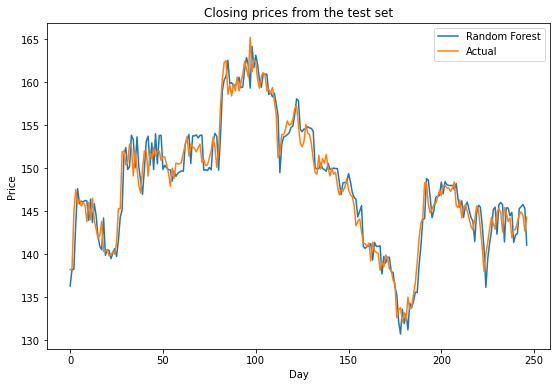

In [4]:
model = RandomForestRegressor()
model.fit(Xdata_Train, Ydata_Train)

# use the model to make predictions on the test set
y_pred = model.predict(Xdata_Test)

# calculate MAE and store predictions for comparing all models' predictions on one graph
model_name = "Random Forest"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# KNN

Error of kNN regression model: 19.10259103504752


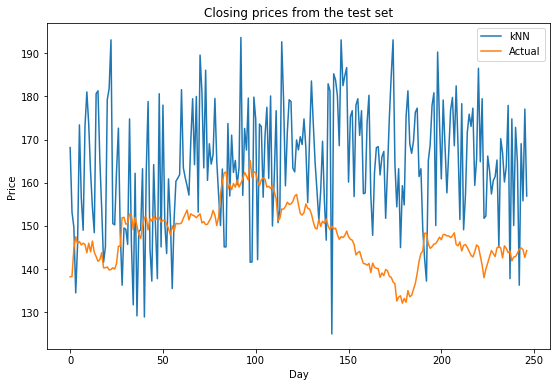

In [5]:
model = KNeighborsRegressor()
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)

# calculate MAE
model_name = "kNN"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# SVM

Error of SVM regression model: 16.50252572404337


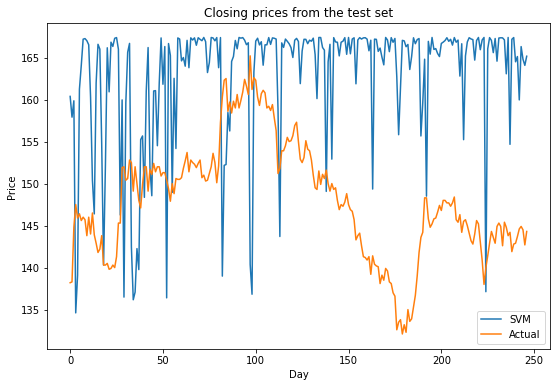

In [6]:
model = SVR()
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)

# calculate error
model_name = "SVM"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()

# MLP

Error of MLP regression model: 89.98695202528519


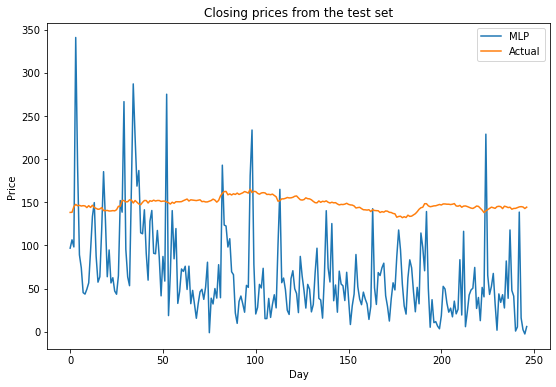

In [7]:
model = MLPRegressor() #hidden_layer_sizes default=(100,)
model.fit(Xdata_Train, Ydata_Train)

# get predictions
y_pred = model.predict(Xdata_Test)

# calculate error
model_name = "MLP"
model_data[model_name] = {
    "error": mean_absolute_error(y_pred, Ydata_Test), 
    "predictions": y_pred
}
print("Error of " + model_name + " regression model:", model_data[model_name]["error"])

# plot the results
plt.figure(figsize=(9,6))
plt.title("Closing prices from the test set")
plt.plot(y_pred, label=model_name)
plt.plot(Ydata_Test, label="Actual")
plt.ylabel('Price')
plt.xlabel('Day')
plt.legend()
plt.show()